# 3-Layer Neural Network using Relu, sigmoid & softmax


In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import pandas as pd
eta = 0.05
epoch = 10000

In [6]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_deriv(x):
    return x * (1.0 - x)

def softmax(x):
    e = np.exp(x - np.max(x))
    return e / np.sum(e, axis=0)

def relu(x):
    return np.maximum(0, x)

def relu_deriv(z):
    return (z > 0).astype(float)

# 3-layer net description
- initialize with two hidden and one output layer
- identify number of neurons as 10, 100 and 3 (for output, red/ball/green)
- relu: ascending function, something like 0 => y=x
- softmax: probabilistic function for multiple classes (upgrated logit)
- layer 1 based on input data, layer 2 based on layer 1 output + layer2 weights itself and num of neurons

In [21]:
class neuralnetwork:
    # neural network model
    
    def __init__(self, x, w1, w2, w3, y):
        self.inputs   = x.T
        self.weights1 = w1
        self.weights2 = w2
        self.weights3 = w3
        self.b1 = np.zeros((10,1)) # bias at first hidden layer 
        self.b2 = np.zeros((100,1)) # bias at second hidden layer 
        self.b3 = np.zeros((3,1)) # bias at output layer 
        self.target   = y.T       # target
        self.output   = np.zeros(self.target.shape)

    def forwardprop(self):
        # forward processing of inputs and weights using sigmoid activation function
        self.hiddenout1 = relu(np.dot(self.weights1, self.inputs) + self.b1)
        self.hiddenout2 = sigmoid(np.dot(self.weights2, self.hiddenout1) + self.b2)
        self.output = softmax(np.dot(self.weights3, self.hiddenout2) + self.b3)

    def backprop(self):
        # backward processing of appling the chain rule to find derivative of the loss function with respect to weights
        delta3 = (self.output - self.target)
        delta2 = np.dot(self.weights3.T, delta3) * sigmoid_deriv(self.hiddenout2)
        delta1 = np.dot(self.weights2.T, delta2) * relu_deriv(self.hiddenout1)
        dw3 = np.dot(delta3, self.hiddenout2.T)
        dw2 = np.dot(delta2, self.hiddenout1.T)
        dw1 = np.dot(delta1, self.inputs.T)

        # update the weights with the derivative of the loss function
        self.weights1 -= eta * dw1 / batchsize
        self.weights2 -= eta * dw2 / batchsize
        self.weights3 -= eta * dw3 / batchsize

        # update biases with the derivative of the loss function
        self.b3 -= eta * np.sum(delta3, axis = 1, keepdims=True) / batchsize
#         print("B3", np.sum(delta3, axis = 1, keepdims=True))
        self.b2 -= eta * np.sum(delta2, axis = 1, keepdims=True) / batchsize # add in row axis, keeping column dimension
        self.b1 -= eta * np.sum(delta1, axis = 1, keepdims=True) / batchsize # add in row axis, keeping column dimension

    def predict(self, x):
        # predict the output for a given input x
        print(self.b1)
        self.hiddenout1 = relu(np.dot(self.weights1, x) + self.b1)
        self.hiddenout2 = sigmoid(np.dot(self.weights2, self.hiddenout1) + self.b2)
        self.output = softmax(np.dot(self.weights3, self.hiddenout2) + self.b3)
        return (self.output)

    def calculate_error(self):               
        # calculate error
        error = np.sum(-self.target * np.log(self.output)) # cross entropy loss function for multi-class classification
        return error
    
    def calculate_accuracy(self):
        # calculate accuracy
        target_label = np.argmax(self.target.T, axis = 1)
        output_label = np.argmax(self.output.T, axis = 1)
        accuracy = 100 * np.sum(target_label == output_label) / float(self.target.T.shape[0])
        return accuracy

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


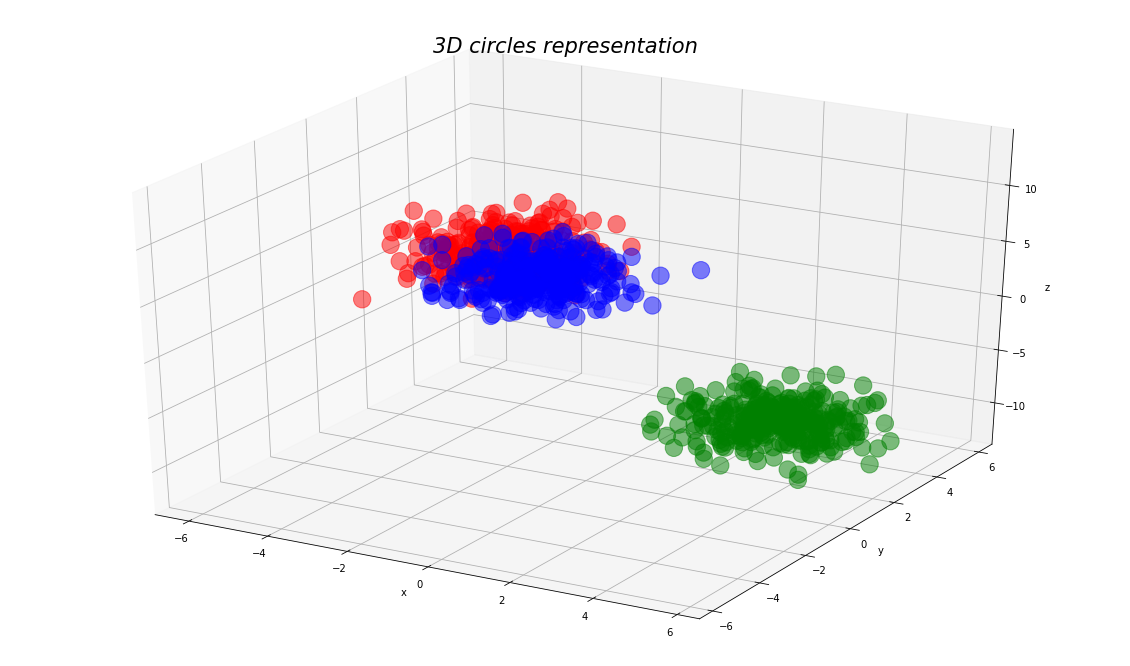

In [22]:
if __name__ == "__main__":

    # get training data set
    samples = 300
    attributes = 3 # <= three dimension
    classes = 3
    
    np.random.seed(45)
    data1_set = np.random.randn(samples, attributes) + np.array([0, -3.0, 10.0])  # red ball <= in 3D
    data2_set = np.random.randn(samples, attributes) + np.array([3.0, 3.0, -10.0])  # green ball <= in 3D
    data3_set = np.random.randn(samples, attributes) + np.array([-3.0, 3.0, 0.0])  # blue ball <= in 3D
   
    feature_set = np.vstack([data1_set, data2_set, data3_set])   
    labels = np.array([0]*samples + [1]*samples + [2]*samples)

    # Initializing colors and building a colormap
    cmap = mpl.colors.ListedColormap(['red', 'green', 'blue'])

    # display data training data set
    fig =  plt.figure(figsize=(20,12))
    ax = plt.axes(projection = '3d')
    ax.scatter3D(feature_set[:,0],feature_set[:,1],feature_set[:,2], c=labels, cmap =cmap, s= 300, alpha=0.5)  
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('3D circles representation', fontsize=21, style='italic')
    
    one_hot_labels = np.zeros((samples*classes, classes))
    #Create one hot vectors with zero values 
    print(one_hot_labels)
    for i in range(samples*classes):  
        one_hot_labels[i, labels[i]] = 1
    
    concat_data = np.concatenate((feature_set, one_hot_labels), axis = 1)
    np.random.shuffle(concat_data) # shuffle the concatenated data 

    # extract training data and test data from concatenated data
    train_data = concat_data[0:np.math.floor(3 * samples * 0.7), :]                 # 70 % samples are selected for training data
    test_data = concat_data[np.math.floor(3 * samples * 0.3):3 * samples, :]  # 30 % samples are selected for test data
    train_inputdata = train_data[:, 0:3] # <= 0 - x; 1 - y; 2 - z;
    train_targetvalue = train_data[:, 3:6] # <= 3, 4, 5 - representation of color 1/0

    test_inputdata = test_data[:, 0:3]
    test_targetvalue = test_data[:, 3:6]

    inputdata = train_inputdata
    targetvalue = train_targetvalue
    batchsize = inputdata.shape[0]

In [23]:
w3 = np.random.rand(3, 100)# from last layer to each of the output(probability of green/red/blue ball)
w2 = np.random.rand(100,10)# from each of 10 nodes on layer1 to 100 nodes of layer2
w1 = np.random.rand(10, inputdata.shape[1])  # input go into 10 nodes on layer1
nn = neuralnetwork(inputdata, w1, w2, w3, targetvalue)

training_loss = []  
training_accuracy = []

# training 
for i in range(epoch):    
    nn.forwardprop()
    nn.backprop()
    if (i % 500) == 0:
        print("Error: ", nn.calculate_error())
        training_loss.append(nn.calculate_error())  # store training loss 
        training_accuracy.append(nn.calculate_accuracy()) #store training accuracy 

print("target")   
print(targetvalue)
print("output after training")   
print(nn.output.T)

Error:  1569.1675815272479
Error:  8.98623118100183
Error:  3.4342619418095888
Error:  2.055919583408678
Error:  1.4527533542708775
Error:  1.118112151495608
Error:  0.9066120672139363
Error:  0.7613943226400826
Error:  0.6556129105266708
Error:  0.57522621687399
Error:  0.5121312925758094
Error:  0.461324196813511
Error:  0.4195576700480556
Error:  0.38463209123101433
Error:  0.355013958376483
Error:  0.32958989977453945
Error:  0.30752573779785275
Error:  0.28820085321166494
Error:  0.27113835720231244
Error:  0.2559655492783342
target
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
output after training
[[9.99511279e-01 2.03846647e-04 2.84873949e-04]
 [9.99511233e-01 2.03846542e-04 2.84920335e-04]
 [5.11142197e-04 6.80413396e-05 9.99420816e-01]
 ...
 [2.42210335e-04 9.99724568e-01 3.32214923e-05]
 [2.06781385e-04 9.99764232e-01 2.89863542e-05]
 [9.99511298e-01 2.03847029e-04 2.84854774e-04]]


## For better visualizing and using in future create dataframe
+ divide in the form: dimension => real => forecast
+ using argmax extract index of max elem, where elem is probability for each class

In [24]:
df = pd.DataFrame(columns=['x', 'y', 'z', 'predict', 'real'])
for i in range(0, len(test_inputdata)):
    x_prediction = np.array([test_inputdata[i]])
    predicted_output = nn.predict(x_prediction.T)
    df.loc[i] = {'x': test_inputdata[i][0], 'y': test_inputdata[i][1], 'z': test_inputdata[i][2], 'predict': np.argmax(predicted_output.T), 'real': np.argmax(test_targetvalue[i])}
print("Accuracy rate is ", len(df[df['predict']==df['real']])/len(df))
print(df)

[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0

 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-

[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0

 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-

[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0

[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0

[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0

 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-

[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0.13624158]
 [-0.16365091]
 [-0.04636871]
 [ 0.44731395]]
[[-0.05627922]
 [-0.16416539]
 [-0.1551112 ]
 [-0.11321293]
 [-0.10265211]
 [-0.00589145]
 [-0

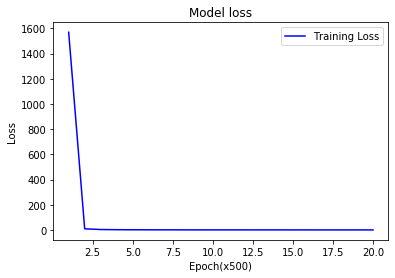

In [8]:
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# visualize model loss
plt.plot(epoch_count, training_loss, 'b-')
plt.title("Model loss")
plt.legend(['Training Loss'])
plt.xlabel('Epoch(x500)')
plt.ylabel('Loss')
plt.show()

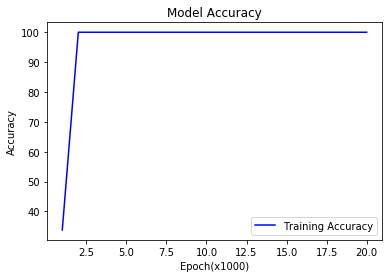

In [9]:
plt.plot(epoch_count, training_accuracy, 'b-')
plt.title('Model Accuracy')
plt.legend(['Training Accuracy'])
plt.xlabel('Epoch(x1000)')
plt.ylabel('Accuracy')
plt.show()


In [4]:
np.zeros((10,1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])